# Klasifikasi Berat Badan Menggunakan Machine Learning

##### Nama    : Rachmadandy Mahendra Shakti
##### NIM     : 4.33.22.0.22
##### Kelas   : TI-1A

Notebook ini melakukan klasifikasi berat badan berdasarkan dataset `obesity.csv`. Proses ini melibatkan beberapa langkah penting dalam pipeline machine learning, termasuk:

1. **Analisis Data Eksploratif (EDA)**: Memahami data melalui statistik deskriptif dan visualisasi.
2. **Penskalaan Data**: Mengubah fitur menjadi skala yang sama untuk meningkatkan performa model.
3. **Seleksi Fitur**: Menghapus kolom yang tidak relevan atau tidak memberikan informasi yang berguna untuk model.
4. **Pembagian Data**: Memisahkan data menjadi set pelatihan dan set pengujian.
5. **Validasi Silang**: Menggunakan teknik validasi silang untuk mengevaluasi performa model.
6. **Evaluasi Performa**: Menggunakan metrik seperti matriks kebingungan, presisi, recall, skor F1, dan akurasi untuk mengevaluasi performa model.

File yang digunakan dalam notebook ini adalah `obesity.csv`, yang berisi data tentang usia, jenis kelamin, tinggi, berat, BMI, dan label berat badan (Normal Weight, Overweight, Underweight, Obese).

## Analisis Data Eksploratif (EDA)

Analisis Data Eksploratif (EDA) adalah proses melakukan investigasi awal pada data, seringkali dengan tujuan untuk lebih memahami karakteristik data dan mengungkap pola atau anomali atau untuk merumuskan hipotesis dan memaksimalkan wawasan dari suatu set data.

Dalam konteks notebook ini, EDA melibatkan beberapa langkah:

1. Memeriksa bentuk DataFrame untuk mengetahui berapa banyak baris dan kolom yang ada dalam data.
2. Menggunakan fungsi `info()` untuk mendapatkan ringkasan singkat tentang DataFrame, termasuk jumlah dan tipe data non-null dalam setiap kolom.
3. Menggunakan fungsi `describe()` untuk menghasilkan statistik deskriptif yang merangkum tendensi sentral, dispersi, dan bentuk distribusi dataset.
4. Memeriksa nilai yang hilang dalam data.
5. Melakukan visualisasi data menggunakan berbagai plot seperti histogram, boxplot, dan scatter plot untuk memahami distribusi data dan hubungan antar variabel.

EDA adalah langkah penting sebelum melanjutkan ke pemodelan machine learning karena dapat membantu kita memahami data dan menemukan pola atau anomali yang mungkin ada.

Bentuk DataFrame (Baris, Kolom) (108, 7)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None

Deskripsi DataFrame:
               ID         Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    56.046296   46.555556  166.574074   59.490741   20.549074
std     31.917939   24.720620   27.873615   28.856233    7.583818
min      1.000000   11.000000  120.000000   10.000000    3.900000
25%     28.750000   27.000000  140.000000   35.000000   16.700000
50%     56.5000

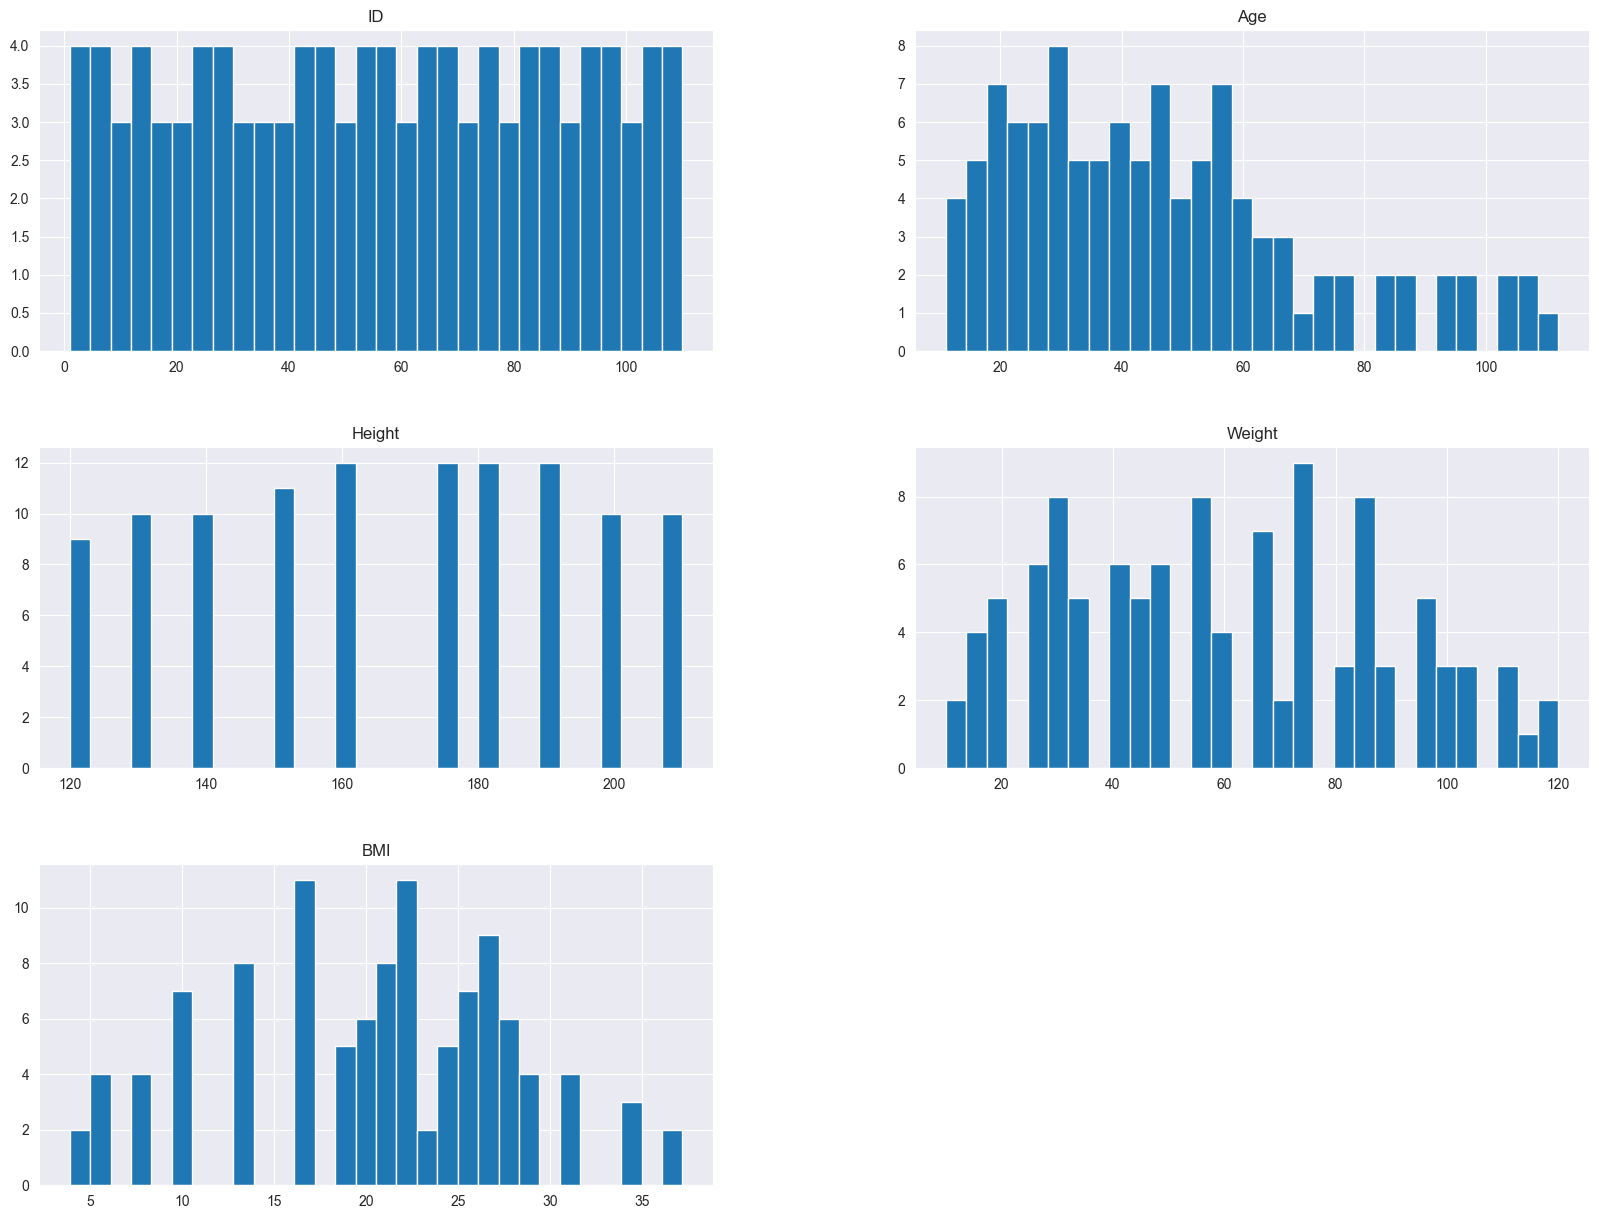

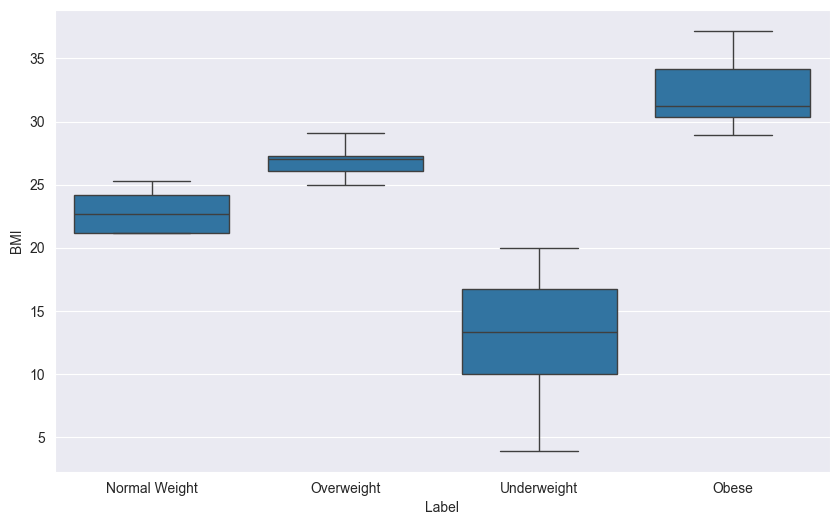

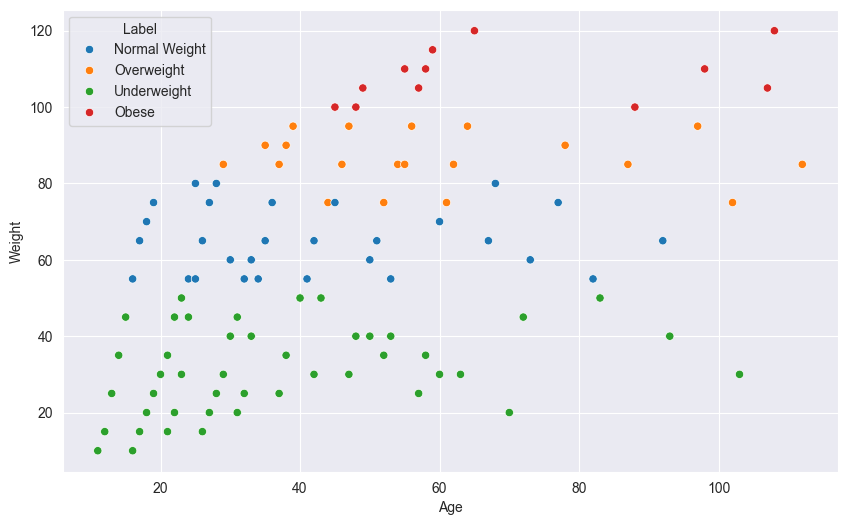

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("obesity.csv")

print("Bentuk DataFrame (Baris, Kolom)", data.shape)

print("\nInformasi DataFrame:")
print(data.info())

print("\nDeskripsi DataFrame:")
print(data.describe())

print("\nNilai yang Null (Missing):")
print(data.isnull().sum())

data.hist(bins=30, figsize=(20,15))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='BMI', data=data)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Weight', hue='Label', data=data)
plt.show()

## Penskalaan Data

Penskalaan data adalah langkah penting dalam pra-pemrosesan data yang diterapkan pada variabel independen atau fitur data. Penskalaan membantu untuk menormalkan data dalam rentang tertentu. Kadang-kadang, penskalaan juga membantu dalam mempercepat perhitungan dalam algoritma.

Dalam konteks notebook ini, fitur 'Age', 'Height', 'Weight', dan 'BMI' diskalakan. Fitur-fitur ini adalah numerik dan memiliki rentang yang berbeda. Misalnya, Age mungkin berkisar dari 0 hingga 100, sementara Height mungkin berkisar dari 100 hingga 200. Penskalaan fitur-fitur ini ke rentang yang sama dapat membantu meningkatkan kinerja model machine learning.

Langkah-langkah untuk penskalaan data dalam notebook ini adalah sebagai berikut:

1. Tentukan fitur yang akan diskalakan. Dalam hal ini, 'Age', 'Height', 'Weight', dan 'BMI' adalah fitur yang akan diskalakan.
2. Inisialisasi StandardScaler. StandardScaler menstandarkan fitur dengan mengurangi rata-rata dan kemudian menskalakan ke varians unit. Varians unit berarti membagi semua nilai dengan standar deviasi.
3. Cocokkan StandardScaler ke fitur dan transformasikan fitur. Metode `fit` digunakan untuk menghitung rata-rata dan standar deviasi, yang akan digunakan untuk penskalaan nanti. Kemudian, metode `transform` digunakan untuk melakukan penskalaan dengan memusatkan dan menskalakan.
4. Ganti fitur asli dengan fitur diskalakan dalam DataFrame.

In [3]:
from sklearn.preprocessing import StandardScaler

fitur_untuk_di_scale = ['Age', 'Height', 'Weight', 'BMI']

scaler = StandardScaler()

data[fitur_untuk_di_scale] = scaler.fit_transform(data[fitur_untuk_di_scale])

data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,-0.876032,Male,0.303700,0.714053,0.629376,Normal Weight
1,2,-0.672829,Female,-0.236952,0.017730,0.258448,Normal Weight
2,3,-0.469625,Male,0.483917,1.062214,0.894325,Overweight
3,4,-0.266422,Female,-0.597387,-0.330431,-0.072738,Underweight
4,5,-0.063219,Male,0.844352,1.410375,1.410975,Obese


## Seleksi Fitur

Seleksi fitur adalah proses pemilihan fitur atau kolom yang paling berguna dalam pembuatan model. Fitur yang tidak relevan atau sebagian relevan dapat berdampak negatif pada kinerja model.

Dalam konteks notebook ini, Anda mungkin ingin menghapus kolom 'ID' karena tampaknya tidak memberikan informasi yang berarti untuk tugas klasifikasi. 

Langkah-langkah untuk seleksi fitur dalam notebook ini adalah sebagai berikut:

1. Tentukan fitur yang akan dihapus. Dalam hal ini, 'ID' adalah fitur yang akan dihapus.
2. Gunakan fungsi `drop` untuk menghapus kolom dari DataFrame.
3. Tampilkan beberapa baris pertama dari DataFrame untuk memastikan bahwa kolom telah dihapus.

In [4]:
data = data.drop(['ID'], axis=1)
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,-0.876032,Male,0.303700,0.714053,0.629376,Normal Weight
1,-0.672829,Female,-0.236952,0.017730,0.258448,Normal Weight
2,-0.469625,Male,0.483917,1.062214,0.894325,Overweight
3,-0.266422,Female,-0.597387,-0.330431,-0.072738,Underweight
4,-0.063219,Male,0.844352,1.410375,1.410975,Obese


## Pembagian Data

Pembagian data adalah proses memisahkan data menjadi set pelatihan dan set pengujian. Set pelatihan digunakan untuk melatih model, sementara set pengujian digunakan untuk mengevaluasi kinerja model. Ini penting untuk memastikan bahwa model kita dapat menggeneralisasi dengan baik ke data baru dan belum pernah dilihat sebelumnya.

Dalam konteks notebook ini, data dibagi menjadi set pelatihan dan set pengujian dengan rasio 80:20. Ini berarti 80% data digunakan untuk pelatihan dan 20% sisanya digunakan untuk pengujian.

Langkah-langkah untuk pembagian data dalam notebook ini adalah sebagai berikut:

1. Tentukan fitur dan target. Dalam hal ini, fitur adalah semua kolom kecuali 'Label', dan target adalah 'Label'.
2. Gunakan fungsi `train_test_split` untuk membagi data menjadi set pelatihan dan set pengujian. Fungsi ini membagi data secara acak.
3. Cetak ukuran set pelatihan dan set pengujian untuk memastikan bahwa pembagian dilakukan dengan benar.

In [5]:
from sklearn.model_selection import train_test_split
data = pd.get_dummies(data, columns=['Gender'])

X = data.drop('Label', axis=1)
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Validasi Silang

Validasi silang adalah teknik resampling yang digunakan untuk mengevaluasi model machine learning pada sampel data terbatas. Teknik yang paling umum adalah validasi silang k-fold, di mana sampel asli dibagi secara acak menjadi k subsampel yang berukuran sama.

Dalam konteks notebook ini, kita menggunakan validasi silang 5-fold pada data pelatihan menggunakan model regresi logistik. Ini berarti data pelatihan dibagi menjadi 5 subsampel, dan model dilatih dan diuji 5 kali, setiap kali dengan subsampel yang berbeda sebagai set pengujian.

Langkah-langkah untuk validasi silang dalam notebook ini adalah sebagai berikut:

1. Inisialisasi model. Dalam hal ini, kita menggunakan model regresi logistik.
2. Lakukan validasi silang. Fungsi `cross_val_score` digunakan untuk melakukan validasi silang. Fungsi ini melatih model pada k-1 subsampel dan menguji model pada subsampel yang tersisa. Proses ini diulang k kali.
3. Cetak skor validasi silang. Fungsi `cross_val_score` mengembalikan skor akurasi untuk setiap lipatan. Rata-rata dari skor ini memberikan ukuran tunggal dari kinerja model.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Skor cross-validation: ", scores)
print("Skor rata-rata cross-validation: ", scores.mean())

Skor cross-validation:  [0.77777778 0.94117647 0.82352941 0.94117647 0.94117647]
Skor rata-rata cross-validation:  0.884967320261438


## Evaluasi Performa

Evaluasi performa adalah proses penilaian kinerja model machine learning. Ada beberapa metrik yang dapat digunakan untuk mengevaluasi kinerja model, termasuk matriks kebingungan, presisi, recall, skor F1, dan akurasi.

Dalam konteks notebook ini, kita menggunakan semua metrik tersebut untuk mengevaluasi kinerja model regresi logistik kita.

Langkah-langkah untuk evaluasi performa dalam notebook ini adalah sebagai berikut:

1. Latih model pada data pelatihan.
2. Buat prediksi pada data pengujian.
3. Hitung matriks kebingungan. Matriks kebingungan adalah tabel yang digunakan untuk menggambarkan kinerja model klasifikasi pada set data di mana nilai sebenarnya diketahui.
4. Hitung presisi. Presisi adalah rasio prediksi positif benar (TP) dibandingkan dengan total prediksi positif (TP + FP).
5. Hitung recall. Recall adalah rasio prediksi positif benar (TP) dibandingkan dengan total aktual positif (TP + FN).
6. Hitung skor F1. Skor F1 adalah rata-rata harmonik dari presisi dan recall.
7. Hitung akurasi. Akurasi adalah rasio prediksi benar (TP + TN) dibandingkan dengan total observasi.

<Figure size 1000x1000 with 0 Axes>

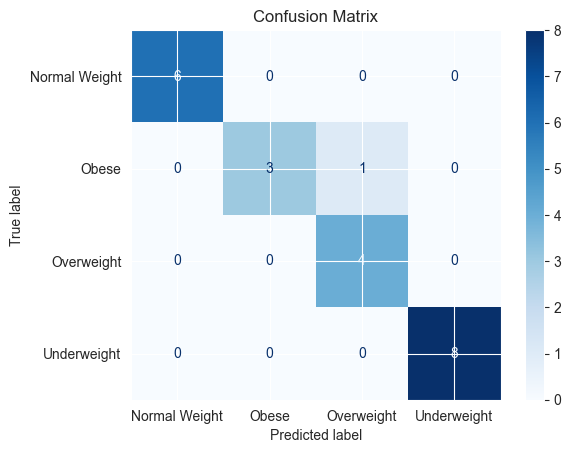


Skor presisi:  0.9636363636363636

Skor recall:  0.9545454545454546

Skor F1:  0.9538239538239538

Skor Akurasi:  0.9545454545454546


In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

skor_presisi = precision_score(y_test, y_pred, average='weighted')
print("\nSkor presisi: ", skor_presisi)

skor_recall = recall_score(y_test, y_pred, average='weighted')
print("\nSkor recall: ", skor_recall)

skor_f1 = f1_score(y_test, y_pred, average='weighted')
print("\nSkor F1: ", skor_f1)

# Calculate the accuracy
skor_akurasi = accuracy_score(y_test, y_pred)
print("\nSkor Akurasi: ", skor_akurasi)

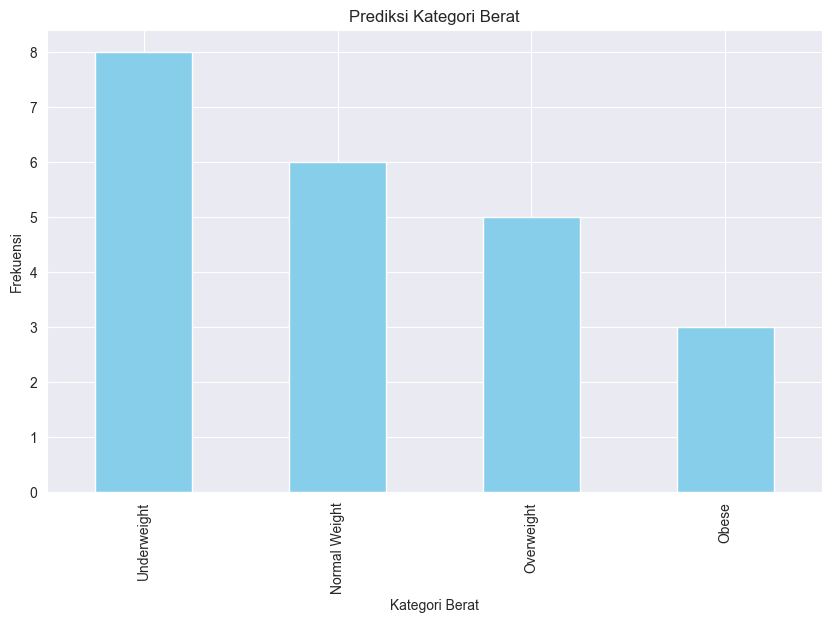

In [16]:
model.fit(X_train, y_train)

y_pred_series = pd.Series(y_pred)

label_counts = y_pred_series.value_counts()

label_counts.plot.bar(figsize=(10, 6), color='skyblue')

plt.xlabel('Kategori Berat')
plt.ylabel('Frekuensi')
plt.title('Prediksi Kategori Berat')
plt.show()